<a href="https://colab.research.google.com/github/shimiiizu/Rotation_test01/blob/main/%E6%91%BA%E6%93%A6%E5%9B%9E%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 摺擦回数の計算

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 空のデータフレームの作成

col = ['page','toner_weight','toner_supply_weight','K']
df = pd.DataFrame(columns=col)
df['K']

Series([], Name: K, dtype: object)

In [3]:
# 耐久枚数のリストを作成

page_moto_list = list(range(0, 21, 1))
page_list = [x * 1000 for x in page_moto_list]
df['page']=page_list
#page_list
df

,page,toner_weight,toner_supply_weight,K
0,0,NaN,NaN,NaN
1,1000,NaN,NaN,NaN
2,2000,NaN,NaN,NaN
3,3000,NaN,NaN,NaN
4,4000,NaN,NaN,NaN
5,5000,NaN,NaN,NaN
6,6000,NaN,NaN,NaN
7,7000,NaN,NaN,NaN
8,8000,NaN,NaN,NaN
9,9000,NaN,NaN,NaN


In [4]:
# トナー重量のリストを作成

# ★初期充填量
toner_weight_ini = 100

# ★消費量
s = 0.005

# ★トナー補給量（のリストを作成）

toner_supply_weight_list = [0,0,0,0,0,0,0,0,0,0,50,50,50,50,50,50,50,50,50,50,50]
df['toner_supply_weight']=toner_supply_weight_list

toner_weight_list = []
for index, page in enumerate(page_list):

  toner_weight_list.append(toner_weight_ini - s*page + toner_supply_weight_list[index])

df['toner_weight']=toner_weight_list
#toner_weight_list

In [5]:
df

,page,toner_weight,toner_supply_weight,K
0,0,100.0,0,NaN
1,1000,95.0,0,NaN
2,2000,90.0,0,NaN
3,3000,85.0,0,NaN
4,4000,80.0,0,NaN
5,5000,75.0,0,NaN
6,6000,70.0,0,NaN
7,7000,65.0,0,NaN
8,8000,60.0,0,NaN
9,9000,55.0,0,NaN


In [11]:
# 摺擦回数の計算の設定

# 1枚当たりの通過トナー量d　= ノリ量×現像移動距離×コート幅
d = 1

# 摺擦回数の初期値：K0
K0 = 0

# トナー補給量：T
T = 50

# 補給開始トナー量：t
t = 50

K_list = [0]
for index, page in enumerate(page_list):
  if index > 0 and index < 11:
    K_list.append(K0 + K_list[index-1] + d / df.loc[index,'toner_weight'])

  elif index == 11:

    # 摺擦回数のリセット
    Ks1 = K_list[10]*toner_weight_list[10]/(toner_weight_list[10] + toner_supply_weight_list[11])





#df['K']=K_list
#df

In [6]:
# 摺擦回数の計算の設定

# 1枚当たりの通過トナー量d　= ノリ量×現像移動距離×コート幅
d = 1

# 摺擦回数の初期値：K0
K0 = 0

# トナー補給量：T
T = 50

# 補給開始トナー量：t
t = 50

K_list = [0]
for index, page in enumerate(page_list):
   if index > 0 :
    #K_list.append(K0 + d / df.loc[index,'toner_weight'])
    K_list.append(K0 + K_list[index-1] + d / df.loc[index,'toner_weight'])

df['K']=K_list
df

,page,toner_weight,toner_supply_weight,K
0,0,100.0,0,0.000000
1,1000,95.0,0,0.010526
2,2000,90.0,0,0.021637
3,3000,85.0,0,0.033402
4,4000,80.0,0,0.045902
5,5000,75.0,0,0.059235
6,6000,70.0,0,0.073521
7,7000,65.0,0,0.088906
8,8000,60.0,0,0.105572
9,9000,55.0,0,0.123754


Text(0, 0.5, 'K')

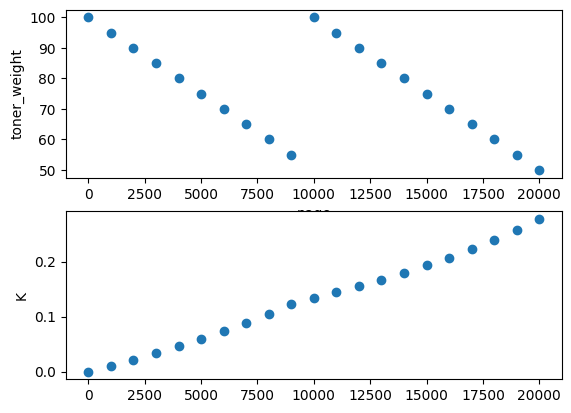

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].scatter(df['page'],df['toner_weight'])
ax[1].scatter(df['page'],df['K'])
ax[0].set_xlabel('page')
ax[0].set_ylabel('toner_weight')
ax[1].set_ylabel('K')